/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)



Preselection

(3000, 2048)
-
2235
0.7450000000000001
-
-
2158
0.9655480984340045
-
-
2148
0.9953671508782774
-
-
2144
0.9981378026070763
-
-
2144
1.0
-
-
2144
1.0
-
Object selection: knn

Dfmf

Parameters

18 18 8 2


auc: 0.6760415512785962

rmse: 1.0060627106534663


-----



auc: 0.6760415512785962

Preselection

(3000, 2048)
-
2235
0.7450000000000001
-
-
2158
0.9655480984340045
-
-
2148
0.9953671508782774
-
-
2144
0.9981378026070763
-
-
2144
1.0
-
-
2144
1.0
-
Object selection: knn

Dfmf

Parameters

16 10 6 8


auc: 0.6588461480941121

rmse: 1.1581821049215328


-----



auc: 0.6588461480941121

Preselection

(3000, 2048)
-
2235
0.7450000000000001
-
-
2158
0.9655480984340045
-
-
2148
0.9953671508782774
-
-
2144
0.9981378026070763
-
-
2144
1.0
-
-
2144
1.0
-
Object selection: knn

Dfmf

Parameters

16 10 6 8


auc: 0.6454486556527372

rmse: 1.1670786510652909


-----



auc: 0.6454486556527372

Preselection

(3000, 2048)
-
2235
0.7450000000000001
-
-
2158
0.9655480984340045
-
-
21

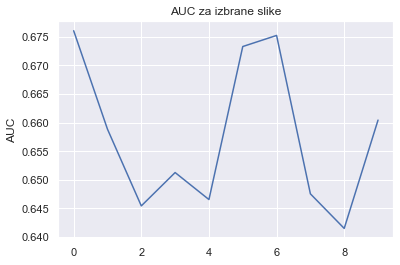

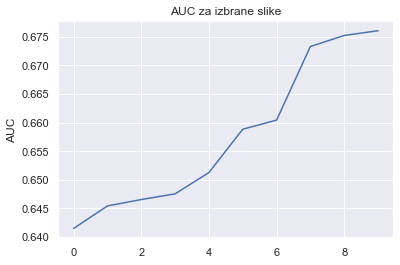

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt

# Parameters
data_directory = '../../data/generated-data-nr-2-n-8-2/'
features_path = '../../data/features-generated-data-nr-2-n-8-2'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = []
true_objects_indexes = [0, 1, 2, 3, 4, 5, 6, 7]
false_objects_indexes = [8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds, binary=True)

features = get_features(features_path, name_vector)

# K Nearest Neighbors
cv_results_file = '../results/cv-generated-data-nr-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    #selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-8-2-knn.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

Parameters

18 18 2 2


rmse: 1.0142078988118421


-----



auc: 0.7043947977885231
Object selection: random

Dfmf

Parameters

10 10 6 6


rmse: 1.273317002337219


-----



auc: 0.6066875635798231
Object selection: random

Dfmf

Parameters

10 10 6 6


rmse: 1.271499550237251


-----



auc: 0.6464763884070457
Object selection: random

Dfmf

Parameters

10 10 6 6


rmse: 1.266538010978787


-----



auc: 0.6472218152218152
Object selection: random

Dfmf

Parameters

10 10 6 6


rmse: 1.2514335618341643


-----



auc: 0.6399868938401049
Object selection: random

Dfmf

Parameters

10 10 6 6


rmse: 1.270658033133258


-----



auc: 0.6302458983910596
Object selection: random

Dfmf

Parameters

10 10 6 6


rmse: 1.2756014002562406


-----



auc: 0.6199571109631428
Object selection: random

Dfmf

Parameters

10 10 6 6


rmse: 1.2547927875231508


-----



auc: 0.6449484263422375
Object selection: random

Dfmf

Parameters

10 10 6 6


rmse: 1.257439786929

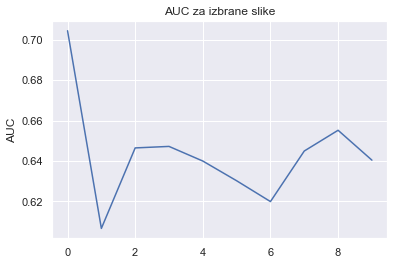

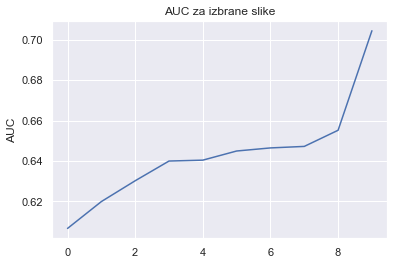

In [2]:
# Random selection
cv_results_file = '../results/cv-generated-data-nr-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-8-2-random.csv'
save_scores(scores, results_file)


Preselection

(3000, 2048)
-
2199
0.733
-
-
2159
0.9818099135970896
-
-
2152
0.9967579714624222
-
-
2148
0.9981410473071409
-
-
2146
0.9990689013035382
-
Object selection: rf

Dfmf

Parameters

12 12 2 2


rmse: 1.134779373908932


-----



auc: 0.6572282430213465

Preselection

(3000, 2048)
-
2227
0.7423333333333333
-
-
2179
0.9784493548047726
-
-
2176
0.9986244841815681
-
-
2173
0.9986219562395111
-
Object selection: rf

Dfmf

Parameters

12 12 2 2


rmse: 1.1428903279296405


-----



auc: 0.6433505814573776

Preselection

(3000, 2048)
-
2216
0.7386666666666667
-
-
2176
0.981951488436851
-
-
2173
0.9986225895316805
-
-
2173
1.0
-
-
2173
1.0
-
Object selection: rf

Dfmf

Parameters

12 12 2 2


rmse: 1.1281740292466305


-----



auc: 0.6542343068275618

Preselection

(3000, 2048)
-
2225
0.7416666666666667
-
-
2180
0.9797770914950656
-
-
2175
0.9977062105360218
-
-
2174
0.9995402298850574
-
-
2173
0.9995395948434623
-
Object selection: rf

Dfmf

Parameters

12 12 2 2


rmse: 1.13701

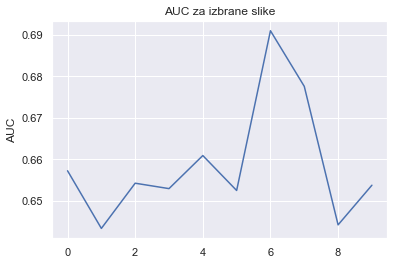

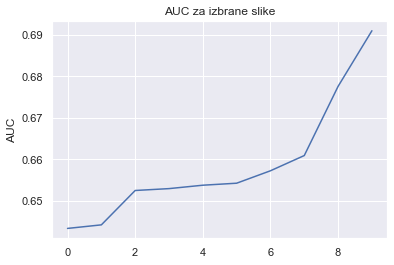

In [3]:


# Random forest
cv_results_file = '../results/cv-generated-data-r-2-n-8-2-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-nr-2-n-8-2-rf.csv'
save_scores(scores, results_file)

In [4]:
from basic_factorization import BasicFactorization


cv_results_file = '../results/cv-generated-data-nr-2-n-8-2-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=True, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
results_file = '../scores/generated-data-nr-2-n-8-2-b.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

auc: 0.6737136400748848
Object selection: random

Dfmf

auc: 0.6611287695960131
Object selection: random

Dfmf

auc: 0.6600092287938368
Object selection: random

Dfmf

auc: 0.6509683514407181
Object selection: random

Dfmf

auc: 0.6657308720292624
Object selection: random

Dfmf

auc: 0.6863494380008706
Object selection: random

Dfmf

auc: 0.6689498503300939
Object selection: random

Dfmf

auc: 0.6842977089299662
Object selection: random

Dfmf

auc: 0.6755446040761779
Object selection: random

Dfmf

auc: 0.6694666052361438
